In [26]:
from scipy import misc
from scipy import ndimage
%matplotlib inline
import matplotlib.pyplot as plt
import scipy

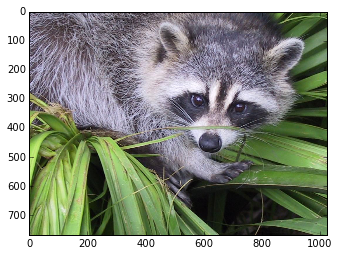

In [2]:
f = misc.face()
plt.imshow(f)
plt.show()

In [20]:
?plt.imshow

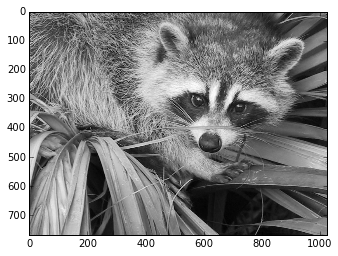

In [19]:
plt.imshow(face, cmap=plt.cm.gray)

In [13]:
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

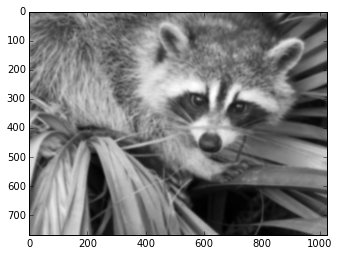

In [21]:
plt.imshow(filter_blurred_f, cmap=plt.cm.gray)

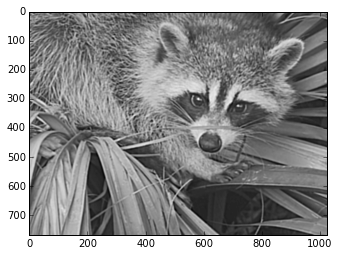

In [24]:
plt.imshow(sharpened, cmap=plt.cm.gray)

In [25]:
?ndimage.gaussian_filter

In [27]:
print scipy.__file__

/Users/haosutang/anaconda/lib/python2.7/site-packages/scipy/__init__.pyc


In [28]:
local_contrast_mask = face - blurred_f

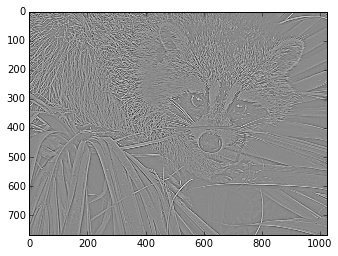

In [29]:
plt.imshow(local_contrast_mask, cmap=plt.cm.gray)

###

In [33]:
import numpy as np

In [31]:
shape=(3,3)
sigma=0.5

In [34]:
m,n = [(ss-1.)/2. for ss in shape]
y,x = np.ogrid[-m:m+1,-n:n+1]
h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
sumh = h.sum()
if sumh != 0:
    h /= sumh

In [39]:
sumh

1.6146036885013877

In [40]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

### Local contrast mask

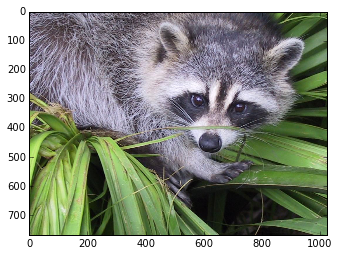

In [42]:
plt.imshow(f)

In [44]:
f_blurred = ndimage.gaussian_filter(f, 3)

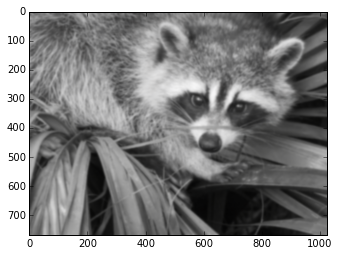

In [45]:
plt.imshow(f_blurred)

In [48]:
f.shape

(768, 1024, 3)

In [51]:
f

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

In [52]:
f_red = f[:, :, 0]

In [62]:
f_green = f[:,:,1]

In [63]:
f_blue = f[:,:,2]

In [60]:
f_red_blurred = ndimage.gaussian_filter(f_red, 3)

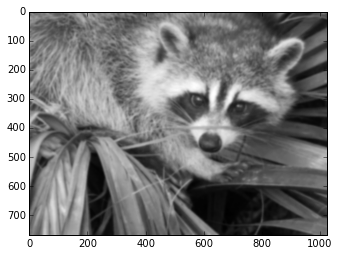

In [61]:
plt.imshow(f_red_blurred, cmap=plt.cm.gray)

In [64]:
f_red_blurred = ndimage.gaussian_filter(f_red, 3)
f_green_blurred = ndimage.gaussian_filter(f_green, 3)
f_blue_blurred = ndimage.gaussian_filter(f_blue, 3)

In [66]:
new_f  = np.zeros_like(f)

In [67]:
new_f[:, :, 0] = f_red_blurred
new_f[:, :, 1] = f_green_blurred
new_f[:, :, 2] = f_blue_blurred

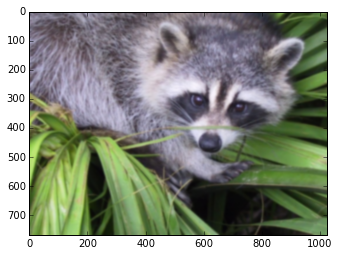

In [68]:
plt.imshow(new_f)

In [69]:
local_mask = f - new_f

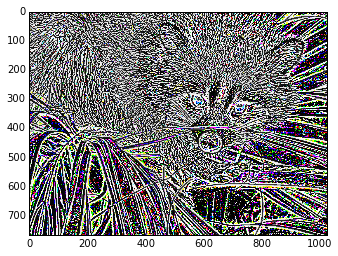

In [70]:
plt.imshow(local_mask)

In [71]:
f_red

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ..., 
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

(array([  65056.,   61030.,   99521.,  123427.,  126716.,  111678.,
         104158.,   60581.,   29064.,    5201.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

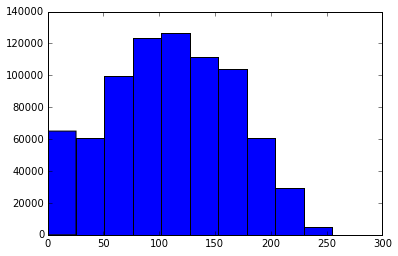

In [77]:
plt.hist([i for sub in f_red for i in sub])

###

In [83]:
face = misc.face(gray=True).astype(float)

In [87]:
def show(img):
    plt.imshow(img, cmap=plt.cm.gray)

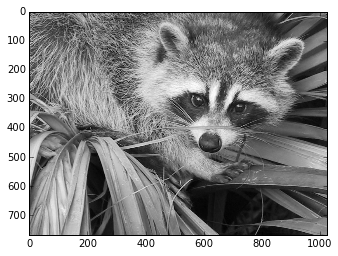

In [86]:
plt.imshow(face, cmap=plt.cm.gray)

In [89]:
face_blurred = ndimage.gaussian_filter(face,3)

In [90]:
unsharp_mask = face-face_blurred

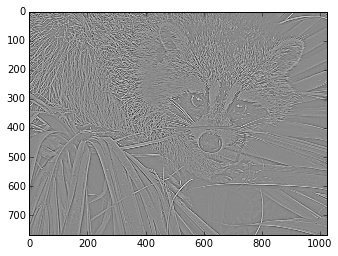

In [91]:
show(unsharp_mask)